In [1]:
import pandas as pd

In [2]:
import sklearn.metrics
def evaluation_metrices(y_true,y_pred):
    accuracy =sklearn.metrics.accuracy_score(y_true, y_pred)
    precision=sklearn.metrics.precision_score(y_true, y_pred)
    recall   =sklearn.metrics.recall_score(y_true, y_pred)
    f1_score =sklearn.metrics.f1_score(y_true, y_pred)
    print("Accuracy:",accuracy)
    print("Precision:",precision)
    print("Recall:",recall)
    print('F1 score:',f1_score)

In [3]:
import re

In [4]:
df=pd.read_csv('/Users/uditanshugupta/Downloads/train.csv')

In [5]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [6]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
## Get the Independent Features

X=df.drop('label', axis=1)

In [8]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [9]:
## Get the Dependent features
y=df['label']

In [10]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [11]:
df.shape

(20800, 5)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [13]:
df=df.dropna()

In [14]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [15]:
messages=df.copy()

In [16]:
messages.reset_index(inplace=True)

In [17]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [18]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [19]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [20]:
corpus[3]

'civilian kill singl us airstrik identifi'

In [21]:
## Hashing Vectorizer 
from sklearn.feature_extraction.text import HashingVectorizer
hs_vectorizer=HashingVectorizer(n_features=5000,alternate_sign=False)
X=hs_vectorizer.fit_transform(corpus).toarray()

In [22]:
X.shape

(18285, 5000)

In [23]:
y=messages['label']

In [24]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [25]:
X_train.shape

(12250, 5000)

In [26]:
X_test.shape

(6035, 5000)

In [27]:
y_train.shape

(12250,)

In [28]:
y_test.shape

(6035,)

In [29]:
hs_vectorizer.get_params()

{'alternate_sign': False,
 'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'n_features': 5000,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None}

In [30]:
count_df = pd.DataFrame(X_train)

In [31]:
count_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.316228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [34]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [35]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.8707539353769677
Precision: 0.9124668435013262
Recall: 0.780045351473923
F1 score: 0.841075794621027
accuracy:   0.871
Confusion matrix, without normalization


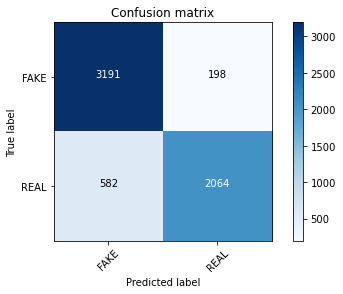

In [36]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [37]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8707539353769677

In [38]:
y_train.shape

(12250,)

### Passive Aggressive Classifier Algorithm

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

Accuracy: 0.9010770505385253
Precision: 0.8807134894091416
Recall: 0.8956916099773242
F1 score: 0.8881394041596402
accuracy:   0.901
Confusion matrix, without normalization


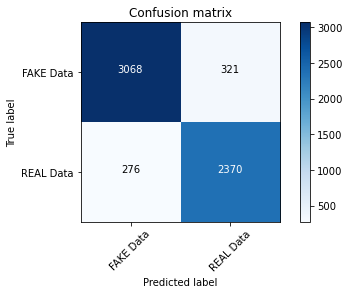

In [40]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [41]:
classifier=MultinomialNB(alpha=0.3)

In [42]:
previous_score=0
for alpha in np.arange(0,1,0.3):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    evaluation_metrices(y_test,pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

Accuracy: 0.9010770505385253
Precision: 0.8807134894091416
Recall: 0.8956916099773242
F1 score: 0.8881394041596402
Alpha: 0.0, Score : 0.8293289146644574
Accuracy: 0.9010770505385253
Precision: 0.8807134894091416
Recall: 0.8956916099773242
F1 score: 0.8881394041596402
Alpha: 0.3, Score : 0.8737365368682685
Accuracy: 0.9010770505385253
Precision: 0.8807134894091416
Recall: 0.8956916099773242
F1 score: 0.8881394041596402
Alpha: 0.6, Score : 0.8727423363711682
Accuracy: 0.9010770505385253
Precision: 0.8807134894091416
Recall: 0.8956916099773242
F1 score: 0.8881394041596402
Alpha: 0.8999999999999999, Score : 0.8710853355426678


/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


In [43]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.8710853355426678

In [46]:
classifier.coef_[0]

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-9.07788046, -6.98564272, -9.05997912, ..., -9.68688606,
       -9.93200852, -9.13511477])

### GaussianNB Algorithm

In [49]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()

In [50]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.6202154101077051
Precision: 0.5446068548387096
Recall: 0.8167044595616024
F1 score: 0.6534623525854247
accuracy:   0.620
Confusion matrix, without normalization


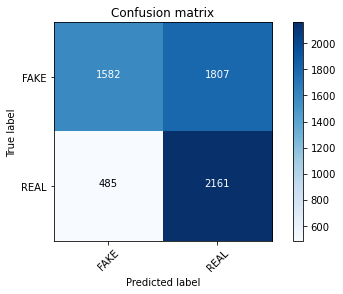

In [51]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

### Logistic Regression 

In [52]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [53]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.9143330571665286
Precision: 0.8521336420774065
Recall: 0.9735449735449735
F1 score: 0.9088022578938083
accuracy:   0.914
Confusion matrix, without normalization


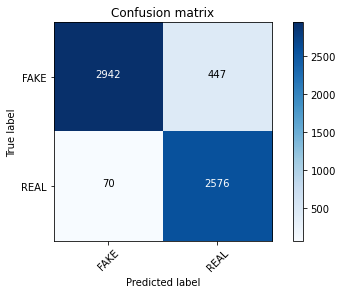

In [54]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

### Decision Tree Algorithm

In [55]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [56]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.8980944490472246
Precision: 0.8827742178665662
Recall: 0.8851095993953136
F1 score: 0.8839403661068126
accuracy:   0.898
Confusion matrix, without normalization


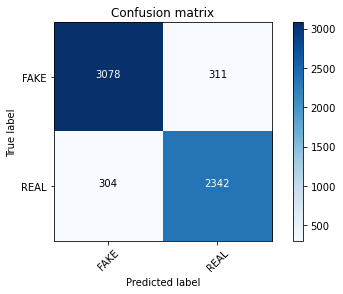

In [57]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

### SVM Classifier

In [63]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)

In [64]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.9181441590720796
Precision: 0.8534822601839684
Recall: 0.981859410430839
F1 score: 0.9131810193321618
accuracy:   0.918
Confusion matrix, without normalization


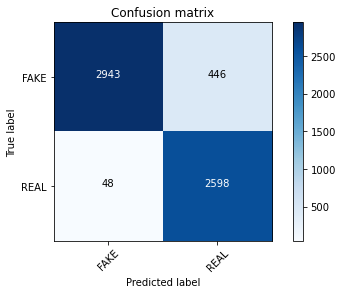

In [65]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

### K-Nearest Neighbour Classifier Algorithim

In [58]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()

In [59]:
from sklearn import metrics
import numpy as np
import itertools

Accuracy: 0.7206296603148301
Precision: 0.6111111111111112
Recall: 0.9977324263038548
F1 score: 0.7579672695951765
accuracy:   0.721
Confusion matrix, without normalization


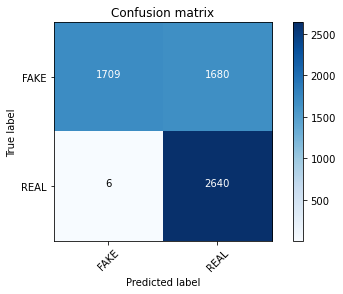

In [60]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

### Random Forest Algorithim

In [61]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

Accuracy: 0.928086164043082
Precision: 0.8772169167803547
Recall: 0.9720332577475435
F1 score: 0.9221943348870563
accuracy:   0.928
Confusion matrix, without normalization


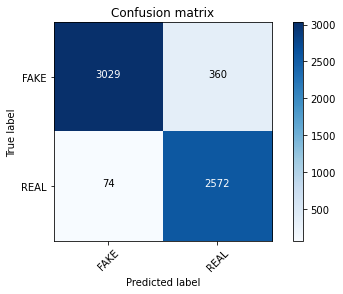

In [62]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
evaluation_metrices(y_test,pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])